# Análise Final La Msion Brasil

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## Carregando os dados

In [2]:
df_completo = pd.read_csv("df_completo_final.csv", sep=",")
df_completo.head(10)

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo,desnivel_positivo,desnivel_negativo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023,13.0,-9.0
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023,88.0,0.0
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023,58.0,0.0
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023,46.0,-81.0
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023,41.0,-58.0
5,André Mapa,Homens,35 a 44,Não informado,2023,6.0,670,2023,128.0,-11.0
6,André Mapa,Homens,35 a 44,Não informado,2023,7.0,258,2023,228.0,-7.0
7,André Mapa,Homens,35 a 44,Não informado,2023,8.0,211,2023,1.0,-243.0
8,André Mapa,Homens,35 a 44,Não informado,2023,9.0,338,2023,1.0,-122.0
9,André Mapa,Homens,35 a 44,Não informado,2023,10.0,544,2023,9.0,-69.0


In [12]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome Atleta        3894 non-null   object 
 1   sexo               3894 non-null   object 
 2   faixa_etaria       3894 non-null   object 
 3   peso               3894 non-null   object 
 4   ano                3894 non-null   int64  
 5   km_prova           3894 non-null   float64
 6   tempo_por_km_seg   3894 non-null   int64  
 7   ano_mais_antigo    3894 non-null   int64  
 8   desnivel_positivo  3881 non-null   float64
 9   desnivel_negativo  3881 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 304.3+ KB


## Análise Exploratória dos dados

Vamos começar analisando o desempenho geral dos atletas. Para isso devemos trasnformar nosso dataframe onde cada linha é um km do atleta, para um novo onde cada linha dever uma única observação do atleta e as variáveis vão ser um resumo.

In [26]:
df_agregado_por_atleta = (
    df_completo.groupby("Nome Atleta")
    .agg(
        # Pega a informação demográfica (que é a mesma em todas as linhas do atleta)
        sexo=("sexo", "first"),
        faixa_etaria=("faixa_etaria", "first"),
        peso=("peso", "first"),
        ano_corrida=("ano", "first"),  # Pega o ano da corrida
        # Calcula as métricas de desempenho e estratégia
        Tempo_Final_seg=("tempo_por_km_seg", "sum"),
        Ritmo_Medio_seg=("tempo_por_km_seg", "mean"),
        Variabilidade_Ritmo_std=(
            "tempo_por_km_seg",
            "std",
        ),  # Desvio padrão do ritmo por km
        # Calcula as métricas de esforço relacionadas ao percurso
        Total_Desnivel_Positivo=("desnivel_positivo", "sum"),
        Total_Desnivel_negativo=("desnivel_negativo", "sum"),
    )
    .reset_index()
)

# Para facilitar a interpretação, vamos converter segundos para minutos
df_agregado_por_atleta["Tempo_Final_min"] = (
    df_agregado_por_atleta["Tempo_Final_seg"] / 60
)
df_agregado_por_atleta["Ritmo_Medio_min"] = (
    df_agregado_por_atleta["Ritmo_Medio_seg"] / 60
)
df_agregado_por_atleta["Variabilidade_Ritmo_min_std"] = (
    df_agregado_por_atleta["Variabilidade_Ritmo_std"] / 60
)

# Vamos ver como ficou
df_agregado_por_atleta.head()

,Nome Atleta,sexo,faixa_etaria,peso,ano_corrida,Tempo_Final_seg,Ritmo_Medio_seg,Variabilidade_Ritmo_std,Total_Desnivel_Positivo,Total_Desnivel_negativo,Tempo_Final_min,Ritmo_Medio_min,Variabilidade_Ritmo_min_std
0,ALFREDO GUIMARAES,Homens,45 a 54,75 a 84 kg,2022,21774,604.833333,290.291331,2787.0,-2790.0,362.900000,10.080556,4.838189
1,Albert Melo,Homens,25 a 34,75 a 84 kg,2022,31986,888.500000,417.596832,2787.0,-2790.0,533.100000,14.808333,6.959947
2,Alessandro Sousa(allê),Homens,45 a 54,65 a 74 kg,2023,33826,939.611111,669.719569,2787.0,-2790.0,563.766667,15.660185,11.161993
3,Alex Junior Aj,Homens,20 a 24,65 a 74 kg,2022,18496,513.777778,261.647539,2787.0,-2790.0,308.266667,8.562963,4.360792
4,Alexandre Santiago,Homens,35 a 44,55 a 64 kg,2022,14894,413.722222,194.192778,2779.0,-2781.0,248.233333,6.895370,3.236546


### Análises gráficas

#### Dstribuição do tempo final

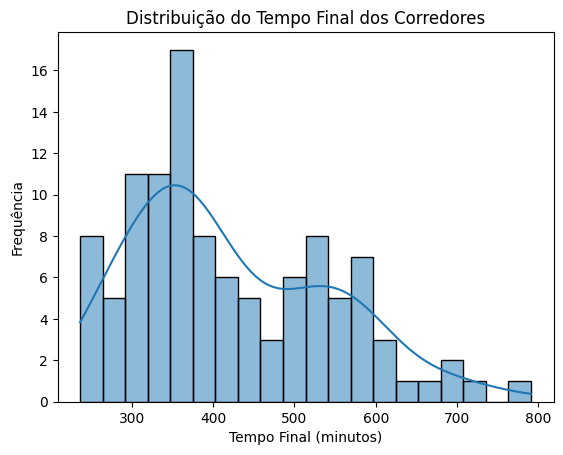

count    109.000000
mean     422.824771
std      123.184123
min      236.400000
25%      329.000000
50%      389.816667
75%      525.333333
max      790.933333
Name: Tempo_Final_min, dtype: float64


In [5]:
sns.histplot(data=df_agregado_por_atleta, x="Tempo_Final_min", bins=20, kde=True)
plt.title("Distribuição do Tempo Final dos Corredores")
plt.xlabel("Tempo Final (minutos)")
plt.ylabel("Frequência")
plt.show()

# Também é útil ver as estatísticas descritivas
print(df_agregado_por_atleta["Tempo_Final_min"].describe())

#### Análise do Sexo

In [10]:
df_agregado_por_atleta["sexo"].value_counts()

sexo
Homens      78
Mulheres    31
Name: count, dtype: int64

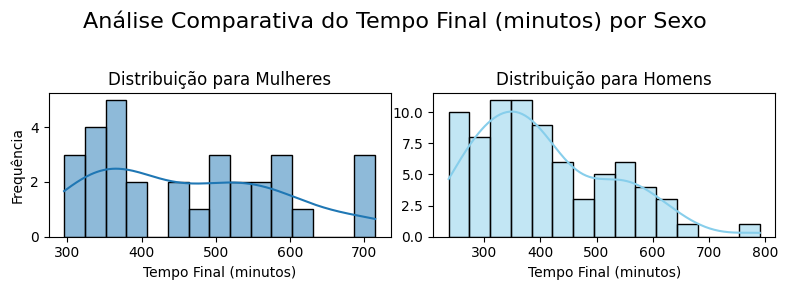

--- Estatísticas Descritivas Comparativas ---
       Mulheres  Homens
count     31.00   78.00
mean     465.33  405.93
std      124.03  119.47
min      295.48  236.40
25%      361.98  314.38
50%      444.90  374.14
75%      557.38  497.89
max      714.43  790.93


In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Título principal para a figura inteira
fig.suptitle("Análise Comparativa do Tempo Final (minutos) por Sexo", fontsize=16)


# 2. Plote o histograma das Mulheres no primeiro eixo (axes[0])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    ax=axes[0],
)  # A chave é especificar o eixo aqui!
axes[0].set_title("Distribuição para Mulheres")
axes[0].set_xlabel("Tempo Final (minutos)")
axes[0].set_ylabel("Frequência")


# 3. Plote o histograma dos Homens no segundo eixo (axes[1])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    color="skyblue",  # Mudar a cor ajuda na diferenciação
    ax=axes[1],
)  # E aqui também!
axes[1].set_title("Distribuição para Homens")
axes[1].set_xlabel("Tempo Final (minutos)")
axes[1].set_ylabel("")  # Pode remover o label do eixo Y para um visual mais limpo


# 4. Exiba os gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para evitar sobreposição
plt.show()


# ======================================================================
# PARTE 2: ESTATÍSTICAS (.DESCRIBE()) LADO A LADO
# ======================================================================

# 1. Calcule o describe() para cada grupo separadamente
desc_mulheres = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"][
    "Tempo_Final_min"
].describe()
desc_homens = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"][
    "Tempo_Final_min"
].describe()


# 2. Use pd.concat para unir as duas saídas como colunas de um novo DataFrame
# axis=1 indica que a concatenação deve ser feita pelas colunas (lado a lado).
# keys=[] define os nomes das novas colunas.
estatisticas_comparativas = pd.concat(
    [desc_mulheres, desc_homens], axis=1, keys=["Mulheres", "Homens"]
)


# 3. Imprima a tabela comparativa final
print("--- Estatísticas Descritivas Comparativas ---")
print(
    estatisticas_comparativas.round(2)
)  # .round(2) para formatar com 2 casas decimais


In [31]:
estatisticas_describe = ["count", "mean", "std", "min", "median", "max"]

# 2. Crie o dicionário de agregação, passando a lista de estatísticas para cada coluna
resumo_completo = (
    df_agregado_por_atleta.groupby("sexo")
    .agg(
        {
            "Tempo_Final_min": estatisticas_describe,
            "Ritmo_Medio_min": estatisticas_describe,
            "Variabilidade_Ritmo_min_std": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualização.
print("--- Resumo Estatístico Detalhado por Sexo ---")
print(resumo_completo.round(2))

--- Resumo Estatístico Detalhado por Sexo ---
                                      count    mean     std     min  median  \
sexo                                                                          
Homens   Ritmo_Medio_min                 78   11.36    3.38    6.57   10.39   
         Tempo_Final_min                 78  405.93  119.47  236.40  374.14   
         Variabilidade_Ritmo_min_std     78    6.63    3.08    2.90    5.13   
Mulheres Ritmo_Medio_min                 31   13.07    3.56    8.21   12.36   
         Tempo_Final_min                 31  465.33  124.03  295.48  444.90   
         Variabilidade_Ritmo_min_std     31    7.98    3.55    3.90    7.11   

                                         max  
sexo                                          
Homens   Ritmo_Medio_min               22.60  
         Tempo_Final_min              790.93  
         Variabilidade_Ritmo_min_std   16.40  
Mulheres Ritmo_Medio_min               20.41  
         Tempo_Final_min              7

C:\Users\Home\AppData\Local\Temp\ipykernel_17400\4168039797.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  }).stack(level=0)


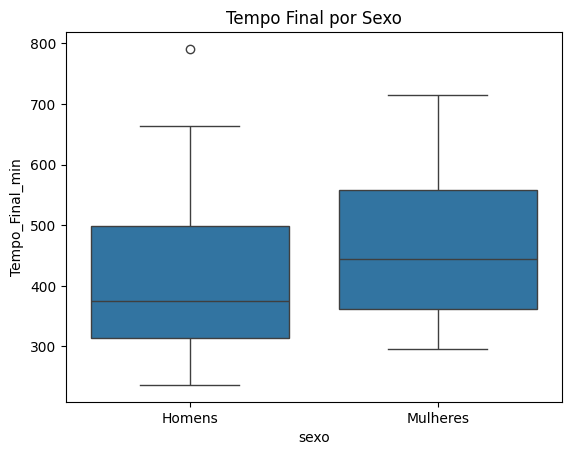

In [6]:
# Sexo vs. Tempo Final
sns.boxplot(data=df_agregado_por_atleta, x="sexo", y="Tempo_Final_min")
plt.title("Tempo Final por Sexo")
plt.show()


#### Análise por Faixa etária

In [32]:
df_agregado_por_atleta["faixa_etaria"].value_counts()

faixa_etaria
35 a 44    45
25 a 34    34
45 a 54    20
20 a 24     6
55 a 64     4
Name: count, dtype: int64

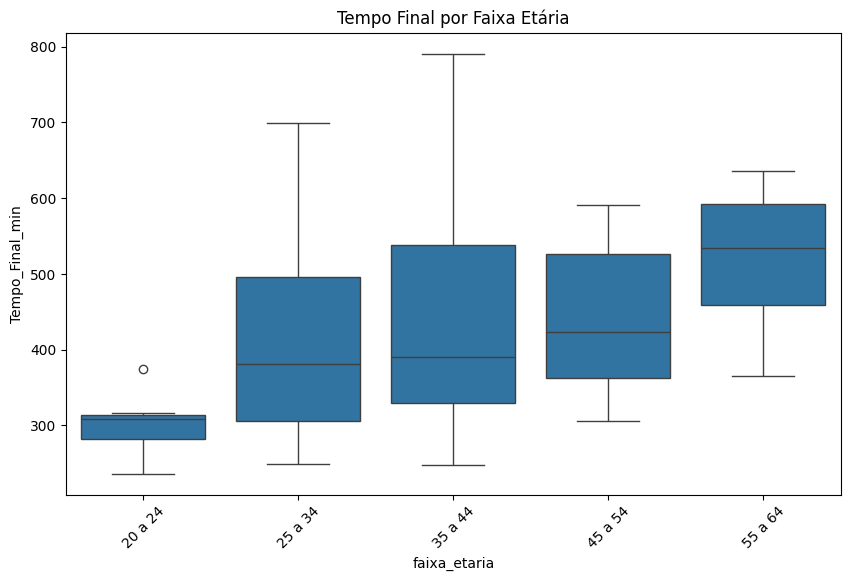

In [7]:
# Faixa Etária vs. Tempo Final
plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura para caber as labels
# Remove None values before sorting to avoid TypeError
faixa_etaria_order = sorted(
    [x for x in df_agregado_por_atleta["faixa_etaria"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta,
    x="faixa_etaria",
    y="Tempo_Final_min",
    order=faixa_etaria_order,
)
plt.title("Tempo Final por Faixa Etária")
plt.xticks(rotation=45)  # Rotaciona as labels do eixo x para não sobrepor
plt.show()

#### Análise por faixa de peso

In [33]:
df_agregado_por_atleta["peso"].value_counts()

peso
65 a 74 kg        34
75 a 84 kg        25
55 a 64 kg        21
54 kg e abaixo    12
Não informado      8
85 a 94 kg         7
95 kg a 104 kg     2
Name: count, dtype: int64

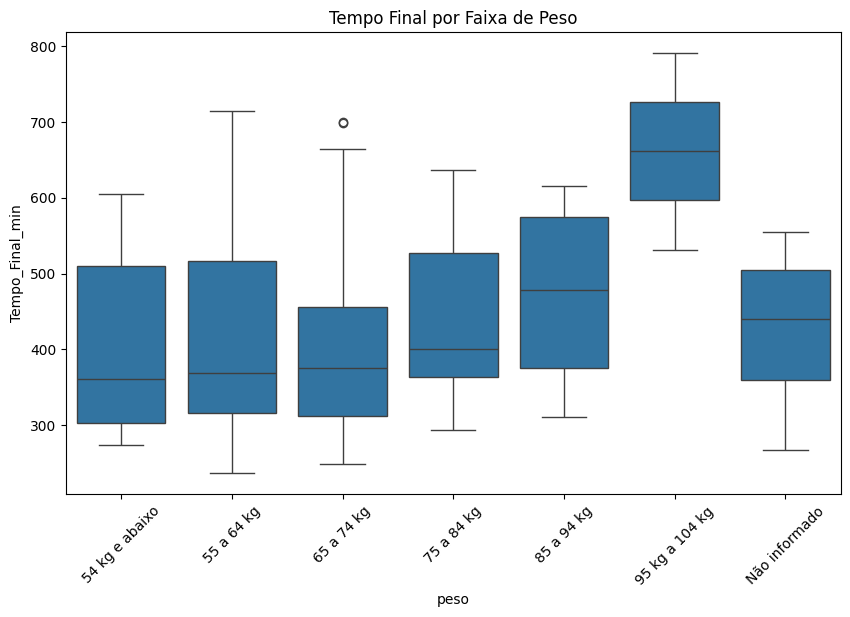

In [8]:
# Peso vs. Tempo Final
plt.figure(figsize=(10, 6))
# Remove None values before sorting to avoid TypeError
peso_order = sorted(
    [x for x in df_agregado_por_atleta["peso"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta, x="peso", y="Tempo_Final_min", order=peso_order
)
plt.title("Tempo Final por Faixa de Peso")
plt.xticks(rotation=45)
plt.show()

#### Análise da Variabilidade de Ritmo

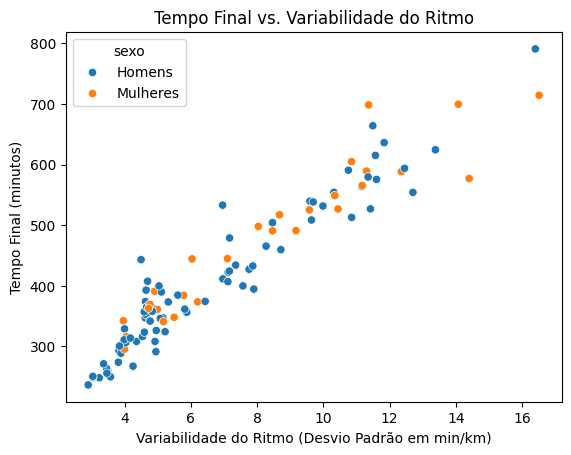

In [35]:
sns.scatterplot(
    data=df_agregado_por_atleta,
    x="Variabilidade_Ritmo_min_std",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Variabilidade do Ritmo")
plt.xlabel("Variabilidade do Ritmo (Desvio Padrão em min/km)")
plt.ylabel("Tempo Final (minutos)")
plt.show()